<a href="https://colab.research.google.com/github/Digvijay4252/Data_Science/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df=pd.read_csv('/content/diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
df.notnull().sum()

,0
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
outcome,768


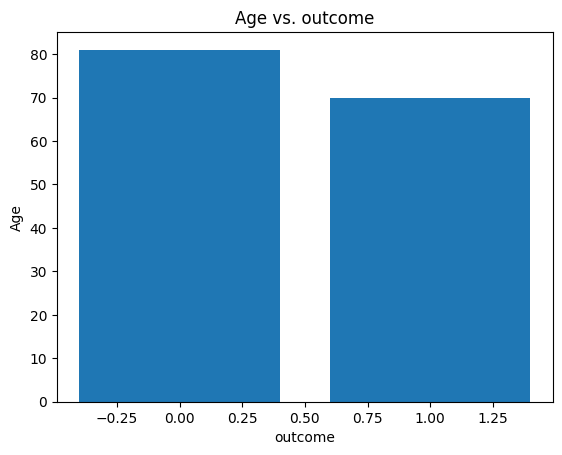

In [40]:
plt.bar(df['outcome'], df['Age'])
plt.ylabel('Age')
plt.xlabel('outcome')
plt.title('Age vs. outcome')
plt.show()

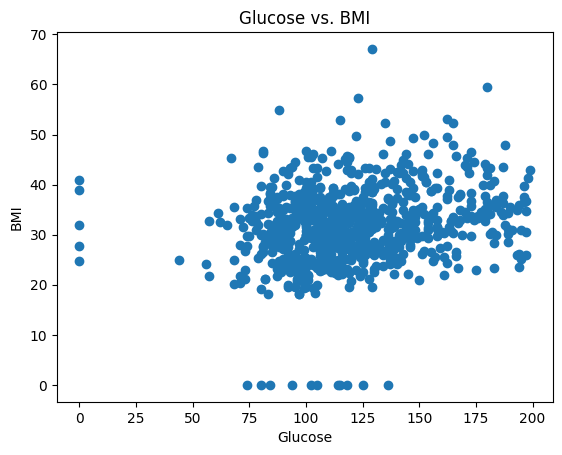

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['Glucose'], df['BMI'])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs. BMI')
plt.show()

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

x = df.drop('outcome', axis=1)
y = df['outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

pred = clf.predict(x_test)
if pred[1]==0:
  print('not diabetic')
else:
  print('diabetic')

not diabetic


In [14]:
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7532467532467533


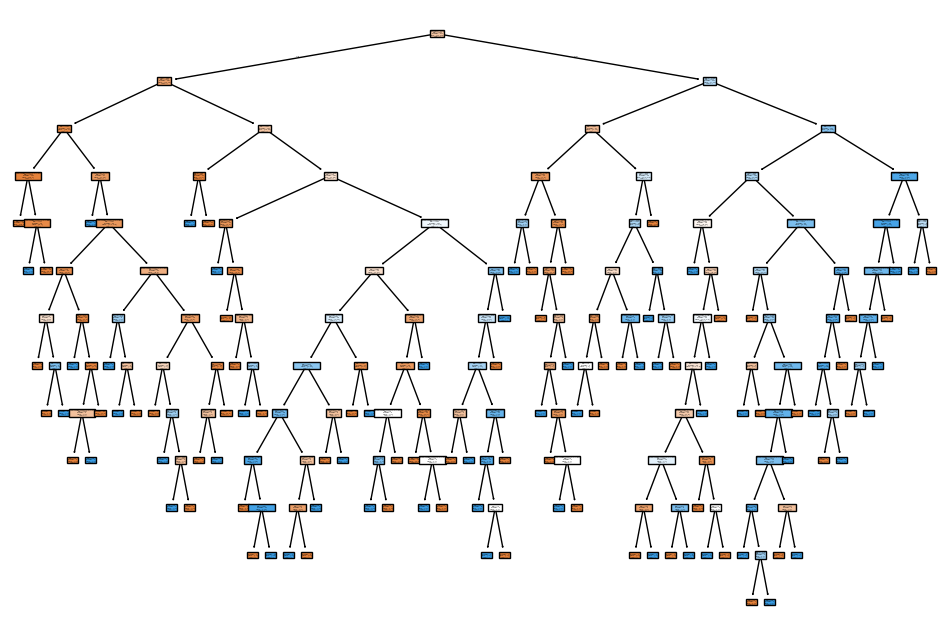

In [15]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names=['0', '1'], filled=True)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)

rf_pred = rf_clf.predict(x_test)

if rf_pred[5] == 0:
    print('not diabetic')
else:
    print('diabetic')

diabetic


In [30]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.7207792207792207


In [25]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(max_iter=1000)
logreg_clf.fit(x_train, y_train)

logreg_pred = logreg_clf.predict(x_test)

if(logreg_pred[5]==0):
  print('not diabetic')
else:
  print('diabetic')

not diabetic


In [31]:
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

Logistic Regression Accuracy: 0.7467532467532467
